In [21]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
from torchvision.utils import make_grid
import numpy as np

In [22]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [23]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.n_features = 36
        self.n_out = 36
        self.model = nn.Sequential(
            nn.Linear(self.n_features, 256),
            nn.LeakyReLU(0.01),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.01),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.01),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.01),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.01),
            nn.Linear(256, self.n_out),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)


In [24]:
# Create an instance of the generator model and load parameters
generator = Generator().to(device)
generator.load_state_dict(torch.load('../model/LearnedPRNG_NIST_passed.pth', map_location=device))
generator.eval()

Generator(
  (model): Sequential(
    (0): Linear(in_features=36, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=1024, out_features=512, bias=True)
    (7): LeakyReLU(negative_slope=0.01)
    (8): Linear(in_features=512, out_features=256, bias=True)
    (9): LeakyReLU(negative_slope=0.01)
    (10): Linear(in_features=256, out_features=36, bias=True)
    (11): Sigmoid()
  )
)

In [25]:
def sample_input(n_features=1, device='cpu'):
    fixed_value0 = np.pi  # 固定値
    fixed_value1 = 2 * np.pi  # 固定値
    
    forarray = np.arange(n_features)
    forones = np.ones((1, n_features))
    forrandarray = forarray * forones
    randarray = fixed_value0 * forrandarray
    output2 = fixed_value1 + randarray
    output3 = np.cos(output2) * 0.5 + 0.5

    return torch.from_numpy(output3.astype(np.float32)).to(device)

In [30]:
# Generate noise
n_features = 36
noise_input = sample_input(n_features, device=device)
generated_images = generator(noise_input).cpu().detach()
#generated_images = noise_input

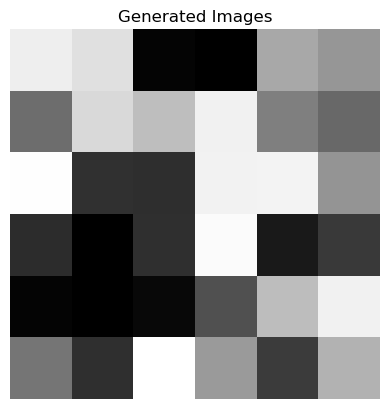

In [31]:
# Plot image
grid_img = make_grid(generated_images.view(-1, 1, 6, 6), nrow=8, normalize=True)
plt.imshow(grid_img.permute(1, 2, 0).numpy(), cmap='gray')
plt.title('Generated Images')
plt.axis('off')
plt.show()